In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import os.path

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from random import randrange
from PIL import Image

In [3]:
def draw_image(fig_num, img, title):
    plt.figure(fig_num)
    plt.imshow(img, cmap='jet')
    plt.colorbar()
    plt.title(title)
    return

mse = tf.keras.losses.MeanSquaredError()
TRAIN_PATH = "C:/Users/UKGC/Desktop/FYP/Datasets/CNN_test/"
TEST_PATH = "C:/Users/UKGC/Desktop/FYP/Datasets/CNN_test/"
amount = 20

In [4]:
true_images = []
for i in range(1,amount+1):
    true_images.append(mpimg.imread(TRAIN_PATH+"True_image/images/true_image"+str(i)+".png"))

In [8]:
dv = sio.loadmat("C:/Users/UKGC/Desktop/FYP/Datasets/CNN_test/dv_data/aa_dv/aa_dv.mat")
data = dv['dv']
#norm = np.linalg.norm(data)
aa_dv = data
#aa_dv = abs(aa_dv)

dv = sio.loadmat("C:/Users/UKGC/Desktop/FYP/Datasets/CNN_test/dv_data/tof_dv/tof_dv.mat")
data = dv['tof_dv']
#norm = np.linalg.norm(data)
tof_dv = data
#tof_dv = abs(tof_dv)

In [10]:
true_images = np.reshape(true_images, (amount, 4096))

In [11]:
print(np.shape(aa_dv))
print(np.shape(tof_dv))
print(np.shape(true_images))

(20, 864)
(20, 864)
(20, 4096)


In [34]:
model = keras.Sequential(
    [
        keras.Input(shape=(864)),
        layers.Dense(32, activation="relu", use_bias=True),
        layers.Dense(32, activation="relu", use_bias=True),
        layers.Dense(32, activation="relu", use_bias=True),
        layers.Dense(32, activation="relu", use_bias=True),
        layers.Dense(4096),
    ]
)
print(model.summary())
model.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
)
model2 = model

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 32)                27680     
_________________________________________________________________
dense_63 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_64 (Dense)             (None, 4096)              135168    
Total params: 163,904
Trainable params: 163,904
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
model.fit(aa_dv, 
          true_images, 
          batch_size=32,
          epochs=10, 
          verbose=1, 
          shuffle="false")

print("-------------------------------------------------------------------------------------")
model2.fit(tof_dv, 
          true_images, 
          batch_size=32,
          epochs=10, 
          verbose=1, 
          shuffle="false")

Epoch 1/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0325
Epoch 2/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 3/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0194
Epoch 4/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 5/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0184
Epoch 6/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0178
Epoch 7/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0176
Epoch 8/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 9/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0172
Epoch 10/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0170
-------------------------------------------------------------------------------------
Epoch 1/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 2/10
235/235 [==

In [29]:
dv = sio.loadmat("C:/Users/UKGC/Desktop/FYP/Code/FYP/K_UST/Example/dv.mat")
data = dv['dv']
aa_dv_test = data
aa_dv_test = abs(aa_dv_test)

dv = sio.loadmat("C:/Users/UKGC/Desktop/FYP/Datasets/CNN_test/dv_data/tof_dv/tof_dv.mat")
data = dv['tof_dv']
tof_dv_test = data
tof_dv_test = abs(tof_dv_test)

In [31]:
aa_dv_test = np.reshape(test_data, (20, 864))

In [41]:
aa_pred = model.predict(abs(aa_dv_test))
print(aa_pred.shape)
aa_pred = np.reshape(aa_pred, (100, 64, 64))

tof_pred = model2.predict(tof_dv)
tof_pred = np.reshape(tof_pred, (7500, 64,64))

(100, 4096)


0.022627092897892


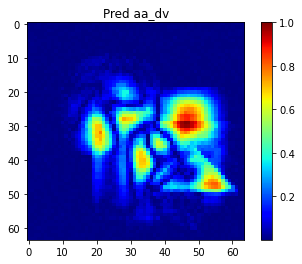

In [57]:
case = randrange(0,100)



#true_test = mpimg.imread("C:/Users/UKGC/Desktop/FYP/Datasets/CNN_train/True_image/images/true_image"+str(case)+".png")


temp_aa = aa_pred[case-1] / np.max(aa_pred[case-1])
temp_aa = abs(temp_aa)

#temp_tof = tof_pred[case-1] / np.max(tof_pred[case-1])
#temp_tof = abs(temp_tof)


#a = (temp_aa*0.5 + temp_tof) / 2
#a = a / np.max(a)

#ev = float(mse(a, true_test))
print(ev)


#draw_image(1, true_test, "True image "+str(case))
draw_image(2, temp_aa, "Pred aa_dv")
#draw_image(3, temp_tof, "Pred tof_dv")
#draw_image(4, a, "avg")


In [26]:
model.save("C:/Users/UKGC/Desktop/FYP/Models/ToF_NN")
model2.save("C:/Users/UKGC/Desktop/FYP/Models/AA_NN")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/UKGC/Desktop/FYP/Models/ToF_NN\assets
INFO:tensorflow:Assets written to: C:/Users/UKGC/Desktop/FYP/Models/AA_NN\assets


In [291]:
a = avg_images[0]
a.shape

(64, 64)

In [27]:
avg_images = []
for i in range(0,20):
    temp_aa = aa_pred[i] / np.max(aa_pred[i])
    temp_aa = abs(temp_aa)

    temp_tof = tof_pred[i] / np.max(tof_pred[i])
    temp_tof = abs(temp_tof)
    
    a = (temp_aa*0.5 + temp_tof) / 2
    a = a / np.max(a)
    a = a * 255
    
    avg_images.append(a)

In [12]:
ToF_NN = keras.models.load_model("C:/Users/UKGC/Desktop/FYP/Models/ToF_NN")
AA_NN = keras.models.load_model("C:/Users/UKGC/Desktop/FYP/Models/AA_NN")

In [22]:
avg_images = []

aa_pred = AA_NN.predict(aa_dv)
tof_pred = ToF_NN.predict(tof_dv)

for i in range(0,20):
    temp_aa = aa_pred[i] / np.max(aa_pred[i])
    temp_aa = abs(temp_aa)

    temp_tof = tof_pred[i] / np.max(tof_pred[i])
    temp_tof = abs(temp_tof)
    
    a = (temp_aa*0.5 + temp_tof) / 2
    a = a / np.max(a)
    a = a * 255
    a = np.reshape(a, (64, 64))
    avg_images.append(a)
    
    

In [24]:

for i in range(0,20):
    current_avg_img = avg_images[i]
    image_mat = (current_avg_img).astype(np.uint8)
    image = Image.fromarray(image_mat)
    image.save("C:/Users/UKGC/Desktop/FYP/Datasets/CNN_test/avg_image/images/avg_image"+str(i+1)+".png")

    #image = mpimg.imread("C:/Users/UKGC/Desktop/FYP/Datasets/CNN_train/avg_image/images/avg_image"+str(i)+".png")
    #draw_image(3, image, "yo")
    
    

In [23]:
np.shape(avg_images)

(20, 64, 64)